**Introduction**

Coronavirus vaccines and the beginning of the vaccination program caused some controversy about the importance of the vaccine. Some people were greatly influenced by conspiracy theories and refused the vaccine due to the widespread of fake news about it, while others have personal exceptions for not accepting the vaccine.

The outbreak of the Corona virus and the large number of infections required the use of machine learning techniques which help to struggle the virus rapidly. As the capacity for immediate clinical decisions and effective usage of healthcare resources is decisive, a lot of work is related to machine learning techniques that rely on machine learning emerged.  This work has tried to help health centers, doctors and health workers in their decisive effort to eliminate the pandemic. One of the methods of work that emerged focused on predicting infection with the Corona virus using eight features like sex, age, known contact with an infected individual and the appearance of five initial clinical symptoms. Other work focused on deep learning such as trying to detect the infection through images taken by CT and X-Ray scans of infected patients.

The idea in this project is to predict the percentage of the acceptance of coronavirus.  This will be done using dataset which was taken from “Mendeley Data” website. The dataset includes information about US citizens like age, race, education level and financial statues.

Predicting the likelihood of receiving the vaccine in the community is an effective option to struggle the virus. The higher rate of acceptance of the vaccine in the community means increasing the ability to get rid of the virus. On the other hand, decreasing this percentage requires taking measures such as raising awareness and struggling the misleading information about the vaccine that widely spread on social media.

In this project, many machine learning algorithms have been used for the prediction task like logistic regression, Random Forest, KNN and Support Vector Machine. The results showed acceptable accuracy achieved by most of these algorithms.

**MATERIALS AND METHODS**

* Dataset Description
The dataset which was used in this work was taken from “Mendeley Data” website and includes information from approximately 2978 respondents. This information includes 94 features like age, gender, sources of Covid-19 updates, financial status, race and education level all of which was collected through a survey. The survey was conducted on the assumption that socio-demographic factors can affect the decision about accepting a vaccine or not. The survey showed that 81.1% of the participants indicated their willingness to accept the vaccine.

The features in the dataset were used as input while “covid_vaccine” feature was used as output. “covid_vaccine” feature represents the answer of the question: Would you like to get COVID-19 vaccine, If available?
The dataset was divided to two parts, first part was used as train data while second part was used as test data with ratio of 70% and 30% respectively.

* Data Processing
The database that was used in this project was not ideal as it had many flaws such as misinformation. In addition, there are many features which have object type and must be converted into numbers to allow computer interpretation. 

Initially, the data was checked to get idea about the null cells for each feature. The features which have high number of null cells were dropped. Most of the dropped features are not important and don’t affect the prediction task (i.e. US_State, child and nasal_spray). For example, the state where the respondent lives, doesn't affect his decision to accept or refuse the vaccine. “Your_race” feature wasn’t dropped because the number of null cells is not high and it is considered as an important factor which can affect the result. The number of remaining features is 76.

Many of these 76 features also have null cells but they were treated in a different way; however, the null cells in these features were filled with the most frequent integer, float or object. For example, the most frequent integer in “healthcare_worker” feature was 0. This feature describes if the respondent is healthcare worker (1) or not (0).

The same procedure was applied to the features which have object components where the null cells were filled with the most frequent object. After filling the null cells, object values in the features were replaced by integers to present it which is an important step for prediction task. For example, the components of the feature “Gender_string” were replaced as follows: Male=0 and Female=1. In addition, some features like “your_race” were encoded as a one-hot numeric array.
Data selection technique was used to eliminate the features that don’t have correlation with the output.

The heat map shows the correlation between the features. The features which have positive and negative correlation with the output were kept. The number of remaining features after applying this technique are 44.


**Experiments**

Machine learning algorithms were used in this work for the classification task. Considering that there are a large number of algorithms in machine learning, the algorithms that were used in this work were chosen on the basis that the project focuses on classification task, as the aim is to identify the relationship between many variables or features and the output (will accept the vaccine or not). In addition, supervised machine learning category was performed as the model will be trained with the given dataset.

With regard to the previous two criteria, the models which were chosen are Random Forest, Logistic Regression, Linear SVC, Support Vector Machines, Naive Bayes, Stochastic Gradient Decent, KNN and Perceptron.

Random forest is classification and regression algorithm which is based on decision trees algorithm. The model consists of large number of individual decision trees that operate as a set. The difference between random forest and decision tree is that a decision tree depends on all dataset for classification or regression, while random forest choose the features randomly to make its decision trees and take the average of the all results. 
Logistic Regression is a machine learning algorithm which depends on the probability. Logistic Regression is generally used when the value of the target variable is categorical.

The Linear SVC algorithm depends on a linear kernel function for classification. This algorithm works well with big datasets which include high number of samples.
Support vector machine is a supervised learning method which can be used for classification, regression and outlier detection. SVM is effective in high dimensional datasets.

A Naive Bayes is a probabilistic machine learning algorithm, it is used for classification task. Naive Bayes classifier is based on the Bayes theorem. Bayes theorem can be summarized as: we can find the probability of A happening, given that B has occurred as the following equation shows with respecting that the predictors are independent.

P(A∖B)=(P(A∖B)P(A))/(P(B))

KNN is a classification model that classifies the data according to the data that is most similar. This algorithm is widely used specially in simple recommendation systems.
Perceptron is a linear and binary classifier. it is used in supervised learning and its output can only be either a 0 or 1.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy
from scipy import ndimage
import glob as gb
import cv2
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
import random
import skimage
from scipy import misc , ndimage
from keras.applications.inception_v3 import preprocess_input
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import backend as K
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
Data = pd.read_csv('../input/the-factors-determining-the-preference-for-vaccine/Data.csv', keep_default_na=False , na_values=[' '])

In [3]:
Data['covid_vaccine']

0       1
1       1
2       1
3       0
4       0
       ..
2973    1
2974    1
2975    1
2976    1
2977    1
Name: covid_vaccine, Length: 2978, dtype: int64

In [4]:
Data.head(20)

,healthcare_worker,family_member_covid,family_member_covid_test,fam_mem_covid_dx,fm_mem_covid_hospitalized,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,...,your_education,your_race,financial_status,US_State,Census_region,Region,Vaccine_Launch (PRE_POST),summary_explanation_of_research_timestamp,Knowledge_normalized,Perceived_threat_normalized
0,1.0,0.0,NaN,NaN,NaN,5.0,1,0,0,1,...,5.0,White,3.0,Florida,South Atlantic,South,No,5/30/2020 17:00,7.496125,4.871027
1,0.0,0.0,NaN,NaN,NaN,5.0,1,0,0,1,...,5.0,Asian,3.0,New York,Mid-Atlantic,Northeast,No,5/31/2020 7:16,NaN,3.947653
2,1.0,1.0,0.0,NaN,NaN,3.0,1,0,1,1,...,4.0,White,3.0,Pennsylvania,Mid-Atlantic,Northeast,No,6/1/2020 8:07,NaN,5.812587
3,1.0,0.0,NaN,NaN,NaN,6.0,0,1,0,1,...,2.0,White,2.0,Pennsylvania,Mid-Atlantic,Northeast,No,6/1/2020 8:44,6.246485,NaN
4,1.0,1.0,1.0,0.0,NaN,6.0,1,0,0,0,...,1.0,White,2.0,Pennsylvania,Mid-Atlantic,Northeast,No,6/1/2020 8:57,6.228922,5.329589
5,1.0,0.0,NaN,NaN,NaN,6.0,0,0,0,0,...,2.0,White,2.0,Pennsylvania,Mid-Atlantic,Northeast,No,6/1/2020 12:23,3.874650,1.603640
6,1.0,1.0,0.0,NaN,NaN,1.0,0,1,0,1,...,2.0,NaN,2.0,Pennsylvania,Mid-Atlantic,Northeast,No,6/1/2020 12:45,6.584258,2.858823
7,0.0,0.0,NaN,NaN,NaN,2.0,1,1,1,1,...,5.0,Black,2.0,New Jersey,Mid-Atlantic,Northeast,No,6/1/2020 18:35,4.029918,0.687841
8,0.0,1.0,1.0,0.0,NaN,6.0,1,1,0,0,...,5.0,Black,2.0,Georgia,South Atlantic,South,No,6/1/2020 19:57,5.154715,8.649194
9,0.0,1.0,1.0,1.0,0.0,2.0,1,1,0,1,...,4.0,White,3.0,Michigan,East North Central,Midwest,No,6/1/2020 20:09,6.285938,6.750402


<AxesSubplot:>

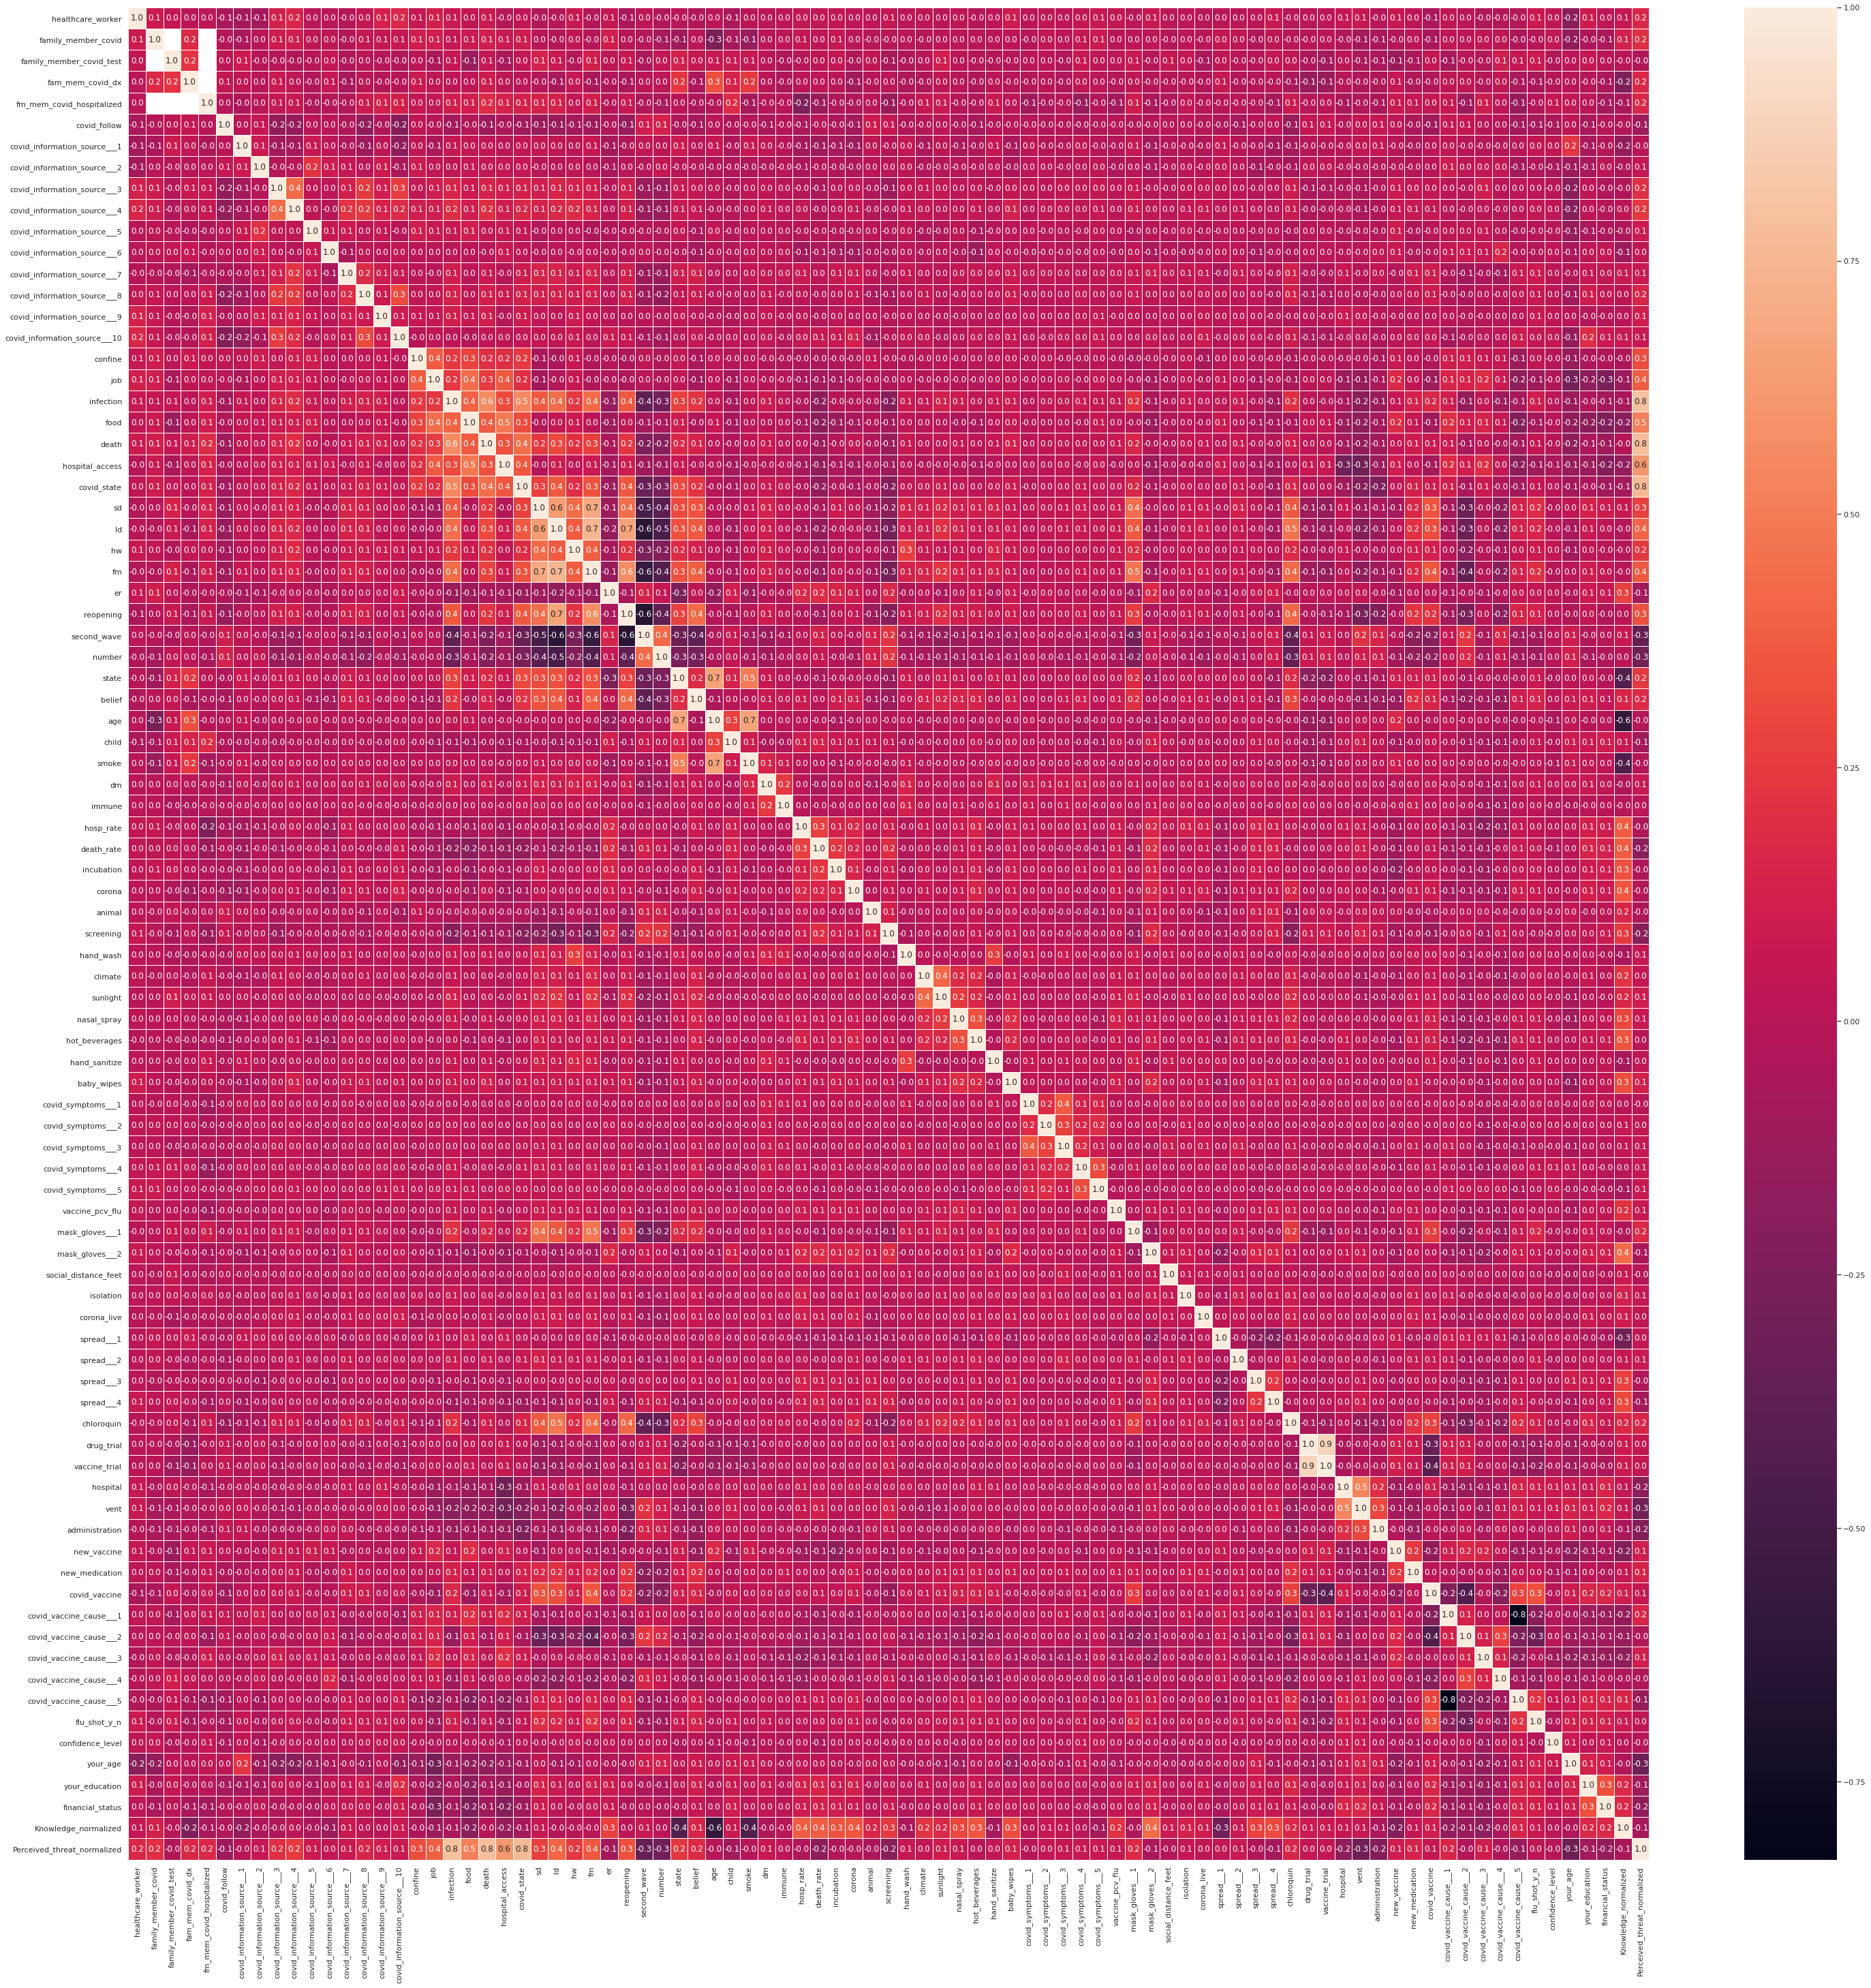

In [5]:
f,ax = plt.subplots(figsize=(50, 50))
sns.heatmap(pd.DataFrame(Data).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2978 entries, 0 to 2977
Data columns (total 94 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   healthcare_worker                          2966 non-null   float64
 1   family_member_covid                        2706 non-null   float64
 2   family_member_covid_test                   772 non-null    float64
 3   fam_mem_covid_dx                           930 non-null    float64
 4   fm_mem_covid_hospitalized                  361 non-null    float64
 5   covid_follow                               2952 non-null   float64
 6   covid_information_source___1               2978 non-null   int64  
 7   covid_information_source___2               2978 non-null   int64  
 8   covid_information_source___3               2978 non-null   int64  
 9   covid_information_source___4               2978 non-null   int64  
 10  covid_information_source

In [7]:
total = Data.isnull().sum().sort_values(ascending=False)
percent = (Data.isnull().sum()/Data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
fm_mem_covid_hospitalized,2617,0.878778
family_member_covid_test,2206,0.740766
fam_mem_covid_dx,2048,0.687710
covid_vaccine_cause___2,1650,0.554063
covid_vaccine_cause___1,1650,0.554063
covid_vaccine_cause___5,1650,0.554063
covid_vaccine_cause___4,1650,0.554063
covid_vaccine_cause___3,1650,0.554063
Region,1364,0.458026
Knowledge_normalized,374,0.125588


In [8]:
Data_New = Data.drop(['fm_mem_covid_hospitalized', 'family_member_covid_test', 'fam_mem_covid_dx', 'covid_vaccine_cause___4', 'covid_vaccine_cause___5', 'covid_vaccine_cause___3', 'covid_vaccine_cause___2', 'covid_vaccine_cause___1', 'Region', 'Knowledge_normalized', 'Perceived_threat_normalized', 'child', 'baby_wipes', 'hot_beverages', 'Census_region', 'US_State', 'nasal_spray', 'summary_explanation_of_research_timestamp', 'Perceived_threat_normalized', 'Knowledge_normalized'], axis=1)
Data_New.head(10)

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,new_medication,covid_vaccine,flu_shot_y_n,confidence_level,Gender_string,your_age,your_education,your_race,financial_status,Vaccine_Launch (PRE_POST)
0,1.0,0.0,5.0,1,0,0,1,NaN,0,1,...,4.0,1,1.0,9.0,Female,4.0,5.0,White,3.0,No
1,0.0,0.0,5.0,1,0,0,1,0.0,0,0,...,2.0,1,1.0,8.0,Male,2.0,5.0,Asian,3.0,No
2,1.0,1.0,3.0,1,0,1,1,0.0,0,0,...,4.0,1,1.0,10.0,Female,3.0,4.0,White,3.0,No
3,1.0,0.0,6.0,0,1,0,1,1.0,0,1,...,1.0,0,1.0,8.0,Female,2.0,2.0,White,2.0,No
4,1.0,1.0,6.0,1,0,0,0,1.0,0,0,...,2.0,0,1.0,9.0,Female,2.0,1.0,White,2.0,No
5,1.0,0.0,6.0,0,0,0,0,0.0,0,1,...,4.0,1,1.0,8.0,Female,5.0,2.0,White,2.0,No
6,1.0,1.0,1.0,0,1,0,1,1.0,0,1,...,4.0,0,1.0,8.0,Male,2.0,2.0,NaN,2.0,No
7,0.0,0.0,2.0,1,1,1,1,0.0,0,1,...,4.0,0,1.0,9.0,Male,2.0,5.0,Black,2.0,No
8,0.0,1.0,6.0,1,1,0,0,1.0,0,1,...,3.0,0,0.0,10.0,Female,3.0,5.0,Black,2.0,No
9,0.0,1.0,2.0,1,1,0,1,1.0,0,1,...,3.0,1,1.0,7.0,Male,3.0,4.0,White,3.0,No


In [9]:
Data_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2978 entries, 0 to 2977
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   healthcare_worker              2966 non-null   float64
 1   family_member_covid            2706 non-null   float64
 2   covid_follow                   2952 non-null   float64
 3   covid_information_source___1   2978 non-null   int64  
 4   covid_information_source___2   2978 non-null   int64  
 5   covid_information_source___3   2978 non-null   int64  
 6   covid_information_source___4   2978 non-null   int64  
 7   covid_information_source___5   2977 non-null   float64
 8   covid_information_source___6   2978 non-null   int64  
 9   covid_information_source___7   2978 non-null   int64  
 10  covid_information_source___8   2978 non-null   int64  
 11  covid_information_source___9   2978 non-null   int64  
 12  covid_information_source___10  2978 non-null   i

In [10]:
Data_New.describe()

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,vent,administration,new_vaccine,new_medication,covid_vaccine,flu_shot_y_n,confidence_level,your_age,your_education,financial_status
count,2966.000000,2706.000000,2952.000000,2978.000000,2978.000000,2978.000000,2978.000000,2977.000000,2978.000000,2978.000000,...,2959.000000,2963.000000,2951.000000,2929.000000,2978.000000,2976.00000,2969.000000,2962.000000,2946.000000,2968.000000
mean,0.182738,0.287140,4.175136,0.665883,0.394224,0.299194,0.603089,0.236816,0.011081,0.659167,...,3.482595,3.046574,1.851915,3.254012,0.810611,0.85047,8.429101,3.055030,3.016972,2.147574
std,0.386516,0.452511,1.867561,0.471760,0.488766,0.457982,0.489339,0.425200,0.104700,0.474069,...,1.050911,1.397834,0.948198,0.943234,0.391883,0.35667,1.392041,1.150896,1.262110,0.675879
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,1.000000,3.000000,1.000000,1.00000,8.000000,2.000000,2.000000,2.000000
50%,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,4.000000,3.000000,2.000000,4.000000,1.000000,1.00000,9.000000,3.000000,3.000000,2.000000
75%,0.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,4.000000,4.000000,3.000000,4.000000,1.000000,1.00000,9.000000,4.000000,4.000000,3.000000
max,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,4.000000,4.000000,1.000000,1.00000,10.000000,5.000000,5.000000,4.000000


In [11]:
Data_New.mode()

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,new_medication,covid_vaccine,flu_shot_y_n,confidence_level,Gender_string,your_age,your_education,your_race,financial_status,Vaccine_Launch (PRE_POST)
0,0.0,0.0,6.0,1,0,0,1,0.0,0,1,...,4.0,1,1.0,8.0,Female,2.0,2.0,White,2.0,Yes


In [12]:
Data_New.describe(include=['O'])

,Gender_string,your_race,Vaccine_Launch (PRE_POST)
count,2934,2874,2978
unique,2,5,2
top,Female,White,Yes
freq,2215,2217,2459


In [13]:
Data_New = Data_New.rename(columns = {"Vaccine_Launch (PRE_POST)":"Vaccine_Launch"})

In [14]:
Data_New.describe(include=['O'])

,Gender_string,your_race,Vaccine_Launch
count,2934,2874,2978
unique,2,5,2
top,Female,White,Yes
freq,2215,2217,2459


In [15]:
Data_New['your_race'].fillna('White', inplace=True)
Data_New['Gender_string'].fillna('Female', inplace=True)
Data_New['Vaccine_Launch'].fillna('Yes', inplace=True)

In [16]:
Data_New['Gender'] = pd.Series(len(Data_New['Gender_string']), index=Data_New.index)
Data_New['Gender'] = 0 
Data_New.loc[Data_New['Gender_string']== 'Male','Gender'] = 0
Data_New.loc[Data_New['Gender_string']== 'Female','Gender'] = 1
Data_New.head()

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,covid_vaccine,flu_shot_y_n,confidence_level,Gender_string,your_age,your_education,your_race,financial_status,Vaccine_Launch,Gender
0,1.0,0.0,5.0,1,0,0,1,NaN,0,1,...,1,1.0,9.0,Female,4.0,5.0,White,3.0,No,1
1,0.0,0.0,5.0,1,0,0,1,0.0,0,0,...,1,1.0,8.0,Male,2.0,5.0,Asian,3.0,No,0
2,1.0,1.0,3.0,1,0,1,1,0.0,0,0,...,1,1.0,10.0,Female,3.0,4.0,White,3.0,No,1
3,1.0,0.0,6.0,0,1,0,1,1.0,0,1,...,0,1.0,8.0,Female,2.0,2.0,White,2.0,No,1
4,1.0,1.0,6.0,1,0,0,0,1.0,0,0,...,0,1.0,9.0,Female,2.0,1.0,White,2.0,No,1


In [17]:
final = pd.get_dummies(Data_New, prefix=['your_race'], columns=['your_race'])

In [18]:
final.head()

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,your_age,your_education,financial_status,Vaccine_Launch,Gender,your_race_Asian,your_race_Black,your_race_Hispanic,your_race_Other,your_race_White
0,1.0,0.0,5.0,1,0,0,1,NaN,0,1,...,4.0,5.0,3.0,No,1,0,0,0,0,1
1,0.0,0.0,5.0,1,0,0,1,0.0,0,0,...,2.0,5.0,3.0,No,0,1,0,0,0,0
2,1.0,1.0,3.0,1,0,1,1,0.0,0,0,...,3.0,4.0,3.0,No,1,0,0,0,0,1
3,1.0,0.0,6.0,0,1,0,1,1.0,0,1,...,2.0,2.0,2.0,No,1,0,0,0,0,1
4,1.0,1.0,6.0,1,0,0,0,1.0,0,0,...,2.0,1.0,2.0,No,1,0,0,0,0,1


In [19]:
final['VaccineLaunch'] = pd.Series(len(final['Vaccine_Launch']), index=final.index)
final['VaccineLaunch'] = 0
final.loc[final['Vaccine_Launch']== 'No','VaccineLaunch'] = 0
final.loc[final['Vaccine_Launch']== 'Yes','VaccineLaunch'] = 1
final.head()

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,your_education,financial_status,Vaccine_Launch,Gender,your_race_Asian,your_race_Black,your_race_Hispanic,your_race_Other,your_race_White,VaccineLaunch
0,1.0,0.0,5.0,1,0,0,1,NaN,0,1,...,5.0,3.0,No,1,0,0,0,0,1,0
1,0.0,0.0,5.0,1,0,0,1,0.0,0,0,...,5.0,3.0,No,0,1,0,0,0,0,0
2,1.0,1.0,3.0,1,0,1,1,0.0,0,0,...,4.0,3.0,No,1,0,0,0,0,1,0
3,1.0,0.0,6.0,0,1,0,1,1.0,0,1,...,2.0,2.0,No,1,0,0,0,0,1,0
4,1.0,1.0,6.0,1,0,0,0,1.0,0,0,...,1.0,2.0,No,1,0,0,0,0,1,0


In [20]:
Data_N = final.drop(['Vaccine_Launch', 'Gender_string'], axis=1)

In [21]:
Data_N.head()

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,your_age,your_education,financial_status,Gender,your_race_Asian,your_race_Black,your_race_Hispanic,your_race_Other,your_race_White,VaccineLaunch
0,1.0,0.0,5.0,1,0,0,1,NaN,0,1,...,4.0,5.0,3.0,1,0,0,0,0,1,0
1,0.0,0.0,5.0,1,0,0,1,0.0,0,0,...,2.0,5.0,3.0,0,1,0,0,0,0,0
2,1.0,1.0,3.0,1,0,1,1,0.0,0,0,...,3.0,4.0,3.0,1,0,0,0,0,1,0
3,1.0,0.0,6.0,0,1,0,1,1.0,0,1,...,2.0,2.0,2.0,1,0,0,0,0,1,0
4,1.0,1.0,6.0,1,0,0,0,1.0,0,0,...,2.0,1.0,2.0,1,0,0,0,0,1,0


In [22]:
Data_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2978 entries, 0 to 2977
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   healthcare_worker              2966 non-null   float64
 1   family_member_covid            2706 non-null   float64
 2   covid_follow                   2952 non-null   float64
 3   covid_information_source___1   2978 non-null   int64  
 4   covid_information_source___2   2978 non-null   int64  
 5   covid_information_source___3   2978 non-null   int64  
 6   covid_information_source___4   2978 non-null   int64  
 7   covid_information_source___5   2977 non-null   float64
 8   covid_information_source___6   2978 non-null   int64  
 9   covid_information_source___7   2978 non-null   int64  
 10  covid_information_source___8   2978 non-null   int64  
 11  covid_information_source___9   2978 non-null   int64  
 12  covid_information_source___10  2978 non-null   i

In [23]:
Data_N.columns

Index(['healthcare_worker', 'family_member_covid', 'covid_follow',
       'covid_information_source___1', 'covid_information_source___2',
       'covid_information_source___3', 'covid_information_source___4',
       'covid_information_source___5', 'covid_information_source___6',
       'covid_information_source___7', 'covid_information_source___8',
       'covid_information_source___9', 'covid_information_source___10',
       'confine', 'job', 'infection', 'food', 'death', 'hospital_access',
       'covid_state', 'sd', 'ld', 'hw', 'fm', 'er', 'reopening', 'second_wave',
       'number', 'state', 'belief', 'age', 'smoke', 'dm', 'immune',
       'hosp_rate', 'death_rate', 'incubation', 'corona', 'animal',
       'screening', 'hand_wash', 'climate', 'sunlight', 'hand_sanitize',
       'covid_symptoms___1', 'covid_symptoms___2', 'covid_symptoms___3',
       'covid_symptoms___4', 'covid_symptoms___5', 'vaccine_pcv_flu',
       'mask_gloves___1', 'mask_gloves___2', 'social_distance_feet',
  

In [24]:
cols = ["healthcare_worker", "family_member_covid", "covid_follow",
       "covid_information_source___1", "covid_information_source___2",
       "covid_information_source___3", "covid_information_source___4",
       "covid_information_source___5", "covid_information_source___6",
       "covid_information_source___7", "covid_information_source___8",
       "covid_information_source___9", "covid_information_source___10",
       "confine", "job", "infection", "food", "death", "hospital_access",
       "covid_state", "sd", "ld", "hw", "fm", "er", "reopening", "second_wave",
       "number", "state", "belief", "age", "smoke", "dm", "immune",
       "hosp_rate", "death_rate", "incubation", "corona", "animal",
       "screening", "hand_wash", "climate", "sunlight", "hand_sanitize",
       "covid_symptoms___1", "covid_symptoms___2", "covid_symptoms___3",
       "covid_symptoms___4", "covid_symptoms___5", "vaccine_pcv_flu",
       "mask_gloves___1", "mask_gloves___2", "social_distance_feet",
       "isolation", "corona_live", "spread___1", "spread___2", "spread___3",
       "spread___4", "chloroquin", "drug_trial", "vaccine_trial", "hospital",
       "vent", "administration", "new_vaccine", "new_medication",
       "covid_vaccine", "flu_shot_y_n", "confidence_level", "your_age",
       "your_education", "financial_status", "Gender", "your_race_White","your_race_Asian","your_race_Hispanic","your_race_Black","your_race_Other",
       "VaccineLaunch"]
Data_N[cols]=Data_N[cols].fillna(Data_N.mode().iloc[0])

In [25]:
Data_N.head(10)

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,your_age,your_education,financial_status,Gender,your_race_Asian,your_race_Black,your_race_Hispanic,your_race_Other,your_race_White,VaccineLaunch
0,1.0,0.0,5.0,1,0,0,1,0.0,0,1,...,4.0,5.0,3.0,1,0,0,0,0,1,0
1,0.0,0.0,5.0,1,0,0,1,0.0,0,0,...,2.0,5.0,3.0,0,1,0,0,0,0,0
2,1.0,1.0,3.0,1,0,1,1,0.0,0,0,...,3.0,4.0,3.0,1,0,0,0,0,1,0
3,1.0,0.0,6.0,0,1,0,1,1.0,0,1,...,2.0,2.0,2.0,1,0,0,0,0,1,0
4,1.0,1.0,6.0,1,0,0,0,1.0,0,0,...,2.0,1.0,2.0,1,0,0,0,0,1,0
5,1.0,0.0,6.0,0,0,0,0,0.0,0,1,...,5.0,2.0,2.0,1,0,0,0,0,1,0
6,1.0,1.0,1.0,0,1,0,1,1.0,0,1,...,2.0,2.0,2.0,0,0,0,0,0,1,0
7,0.0,0.0,2.0,1,1,1,1,0.0,0,1,...,2.0,5.0,2.0,0,0,1,0,0,0,0
8,0.0,1.0,6.0,1,1,0,0,1.0,0,1,...,3.0,5.0,2.0,1,0,1,0,0,0,0
9,0.0,1.0,2.0,1,1,0,1,1.0,0,1,...,3.0,4.0,3.0,0,0,0,0,0,1,0


In [26]:
Data_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2978 entries, 0 to 2977
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   healthcare_worker              2978 non-null   float64
 1   family_member_covid            2978 non-null   float64
 2   covid_follow                   2978 non-null   float64
 3   covid_information_source___1   2978 non-null   int64  
 4   covid_information_source___2   2978 non-null   int64  
 5   covid_information_source___3   2978 non-null   int64  
 6   covid_information_source___4   2978 non-null   int64  
 7   covid_information_source___5   2978 non-null   float64
 8   covid_information_source___6   2978 non-null   int64  
 9   covid_information_source___7   2978 non-null   int64  
 10  covid_information_source___8   2978 non-null   int64  
 11  covid_information_source___9   2978 non-null   int64  
 12  covid_information_source___10  2978 non-null   i

In [27]:
X = Data_N.drop(['covid_vaccine'], axis=1)
y = Data_N["covid_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30 , shuffle= True)

In [28]:
X_train.shape, y_train.shape, X_test.shape

((2084, 79), (2084,), (894, 79))

In [29]:
y_test

495     1
1402    1
2224    1
1026    0
1078    0
       ..
260     1
1733    1
1102    1
1831    1
387     1
Name: covid_vaccine, Length: 894, dtype: int64

In [30]:
#Logistic Regression
logreg = LogisticRegression(solver='lbfgs', max_iter=100000)
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_log
#print("Training set accuracy: ", '%.3f'%(score))
#print("Test set accuracy: ", '%.3f'%(score2))

86.02

In [31]:
# Support Vector Machines
svc = SVC(max_iter=100000 ,probability=True)
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_svc

86.35

In [32]:
#knn 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

83.11

In [33]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian

80.98

In [34]:
#Perceptron
perceptron = Perceptron(max_iter=100000)
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
acc_perceptron

85.46

In [35]:
# Linear SVC
linear_svc = LinearSVC(max_iter=100000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
acc_linear_svc

85.91

In [36]:
# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=10000000)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd

84.68

In [37]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

81.77

In [38]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=20,random_state=1)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

85.91

In [39]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,86.35
2,Logistic Regression,86.02
3,Random Forest,85.91
7,Linear SVC,85.91
5,Perceptron,85.46
6,Stochastic Gradient Decent,84.68
1,KNN,83.11
8,Decision Tree,81.77
4,Naive Bayes,80.98


In [40]:
predictions = random_forest.predict_proba(X_test)

In [41]:
y_pred=svc.predict(X_test)

In [42]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 67, 107],
       [ 15, 705]])

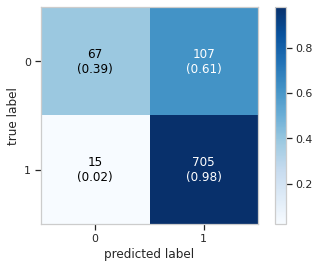

In [43]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plot_confusion_matrix(conf_mat=cm, show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [44]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.81707317 0.8682266 ]
recall: [0.38505747 0.97916667]
fscore: [0.5234375  0.92036554]


In [45]:
import sklearn
from sklearn.metrics import f1_score, precision_score, recall_score
sklearn.metrics.f1_score(y_test, y_pred, labels=None, pos_label=1, average='weighted')

0.8431110854346644

In [46]:
sklearn.metrics.precision_score(y_test, y_pred, labels=None, pos_label=1, average='weighted')


0.8582705642244705

In [47]:
sklearn.metrics.recall_score(y_test, y_pred, labels=None, pos_label=1, average='weighted')

0.8635346756152126